# Image Operators and Processing
<br><br>

## Image Notation

<br>

<b>Image operators are presented with examples to facilitate the correlation between operator notation and protocol realization</b><br><br>

<b>The operator notation is precise so that the programmer will not have to guess at the parameters required to replicate results</b><br><br>

<b>The operators are efficient in that a single operator is directly related to a single Python function</b><br><br>

<b>Given the current maturity of image processing libraries avaiable, many of these operations can be implemented with one function call</b><br><br>

<b>Operators used directly relate to a single python function</b><br><br>

<b>$\boldsymbol{b}[\vec{x}]=A_{m} \boldsymbol{B}_{n} \boldsymbol{C}_{p} \boldsymbol{a}[\vec{x}]$</b><br><br>

<b>$\boldsymbol{a}[\vec{x}]$ is the image input</b><br><br>

<b>$\boldsymbol{b}[\vec{x}]$ is the image output</b><br><br>

<b>$A_{m} \boldsymbol{B}_{n} \boldsymbol{C}_{p}$ define a specific function with the subscripts defining parameters of that function</b><br><br>

<br><br>

<b>Order of operation moves right to left</b><br><br>

<b>An image is usually a two-dimensional array of pixels</b><br><br>

<b>Color, motion or more spatial dimensions increases the dimensionality</b><br><br>

<b>An image is represented as $\boldsymbol{a}[\vec{x}]$ where $\vec{x} \in X$</b><br><br>

<br><br><br><br>

## Image Operators

<br>

<b>Images are manipulated through the application of operators which are organized into several categories</b><br><br>

* <b>Creation operators</b> - creates an image or sets of images<br><br>
* <b>Channel operators</b> - extracts information from specific channels or combine multiple channels into one<br><br>
* <b>Information operators</b> - extracts information from images but do not alter the images<br><br>
* <b>Intensity operators</b> - modifies the intensity of the pixels in an image without changing the shapes (or content) within the image<br><br>
* <b>Geometric operators</b> - moves content within the image but do not change the intensity of the content<br><br>
* <b>Transformation operators</b> - moves the information into a completely different coordinate system or representation<br><br>
* <b>Expansion operators</b> - converts the image information into an expanded space<br>

<br><br><br><br>

## Creation Operators

<br>

<b>Creation operators are used to create images or sets of images</b><br><br>

<b>Only operators that do not act on existing images</b><br><br>

<b>For example: creation of a rectangle for any number of dimensions is</b><br><br>

${\bf a}[\vec x] = {\bf r}_{\vec w; \vec v_1, \vec v_2} [\vec x]$<br>

<b>The vector $\vec w$ may be omitted if the frame size of the image is implied through the application in which it is being used</b><br><br>

<b>Result is that ${\bf a}[\vec x]$ is an image with a solid rectangle filled with pixels that have an intensity of 1, on a black background that have pixels with intensity of 0</b><br><br>

<b>Circle operator, ${\bf c}$, creates an image with a binary circle or sphere</b><br><br>

<b>Other operators create a set of Gabor filters, or a set of Zernike filters</b><br><br>

<b>Images are loaded from a file using the File operator, $Y$, that receives a file name</b><br><br>
    
${\bf a}[\vec x] = Y({\tt fileName})$<br>

<br><br>

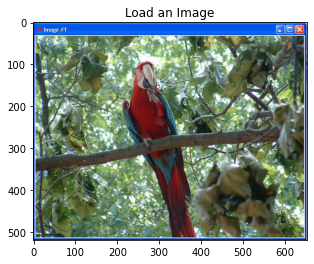

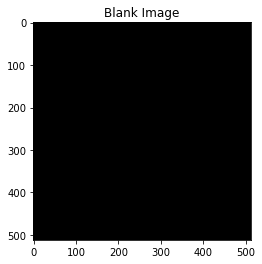

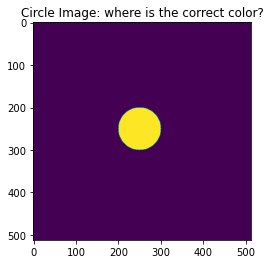

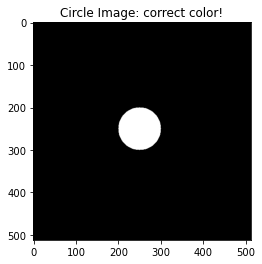

In [ ]:
#  load an image
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import urllib
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
image = Image.open(urllib.request.urlopen(url))

plt.title('Load an Image')
plt.imshow(image)
plt.show()

# create a circle Image
def Circle(size, loc, rad):
    """frame, center, radius
    size is (v,h) of size of array
    loc is (v,h) of circle location
    rad is integer of radius
    returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

adata = np.zeros((512,512))
plt.title('Blank Image')
plt.imshow(adata, cmap='gray')
plt.show()

bdata = Circle((512,512), (250,250), 50)
plt.title('Circle Image: where is the correct color?')
plt.imshow(bdata)
plt.show()

plt.title('Circle Image: correct color!')
plt.imshow(bdata, cmap='gray')
plt.show()


<br><br><br><br><br><br><br><br>

### Creation Operator List

<br>

<div class="alert alert-block alert-info">
${\bf z}_{\vec w}$ Zeros - returns an image of size $\vec w$ with all pixels set to 0<br><br>
${\bf r}_{\vec w; \vec v_1, \vec v_2} [\vec x]$ Rectangle- returns an image with a solid rectangle located at $\vec v_1$ and size $\vec v_2$<br><br>
${\bf o}_{\vec w; \vec v, r}[\vec x]$ Circle - returns an image with a solid circle of radius $r$ located at position $\vec v$<br><br>
${\bf q}_{\vec w} [\vec x]$ Random - returns an image with random numbers between 0 and 1<br><br>
$\mathfrak{G}_{\vec w,\vec f, \vec t, sw} [\vec x]$ Gabor - returns a set of images that are Gabor filters<br><br>
$Y({\tt fileName} )$ Load - loads a file<br><br>
$\mathcal{Z}_{\vec w;r,m,n} [\vec x]$ Zernike - returns a set of images that are Zernike functions<br><br>
$k_{\vec w; r_1, r_2} [\vec x]$ Kaiser - returns an image which contains a Kaiser mask with an inner radius of $r_1$ and an outer radius of $r_2$<br><br>
</div>

<br><br><br><br><br><br><br><br><br><br><br><br>

## Channel Operators

<br>

<b>Channel operators are most commonly these are applied to images that have color channels but can be used for other types of applications as needed</b><br><br>

<b>For example, a medical scan will produce several 2D images, and thus each slice is considered as a channel</b><br><br>

<b>Consider an image ${\bf a}[\vec x]$ which contains three color channels with the common color format of red, green and blue channels</b><br><br>

<b>Channels are denoted as separate entries inside of a stack encased by curly braces</b><br><br>

<b>In this example, the color channels can be separated by:</b><br><br>

$\left\{\begin{array}{l}\mathbf{r}[\vec{x}] \\ \mathbf{g}[\vec{x}] \\ \mathbf{b}[\vec{x}]\end{array}\right\}=\mathcal{L}_{R G B} \mathbf{a}[\vec{x}]$

<br><br>

<b>In the case of a medical scan, there are too many channels to place in a vertical array. Brackets are used to indicate which channels are being used</b><br><br>

$\mathbf{b}[\vec{x}]=\left\{\begin{array}{c}\emptyset \\ <12>1 \\ \emptyset\end{array}\right\} \mathbf{a}[\vec{x}]$

<br><br>

<b>Output ${\bf b}[\vec x]$ is a gray scale image of just that one channel</b><br><br>

<b>Index inside of the brackets does not have to be numeric</b><br><br>

$\mathbf{b}[\vec{x}]=\left\{\begin{array}{c}\emptyset \\ <\text { blue }>1\end{array}\right\} \mathbf{a}[\vec{x}]$

<br><br>

<b>The $\varnothing$ symbols are used to indicate that this is a channel operator, as the curly braces with a single entity may be confused with an image set</b><br><br>

<b>The $\varnothing$ symbol is used to block a channel from passing through an operation</b><br><br>

<b>Thus the isolation of the red information from a color image is described as</b><br><br>

$\mathbf{r}[\vec{x}]=\left\{\begin{array}{l}1 \\ \emptyset \\ \emptyset\end{array}\right\} \mathbf{a}[\vec{x}]$

<br><br>

<b>The $\Join$ symbol allows a channel to pass through the operation without being altered

<b>So, to divide the red channel by 2 and leave the other channels unchanged the notation is</b><br><br>

$\mathbf{b}[\vec{x}]=\left\{\begin{array}{l}0.5 \\ \bowtie \\ \bowtie\end{array}\right\} \mathbf{a}[\vec{x}]$

<br><br>

<b>Finally, a scalar value indicates that all pixels in that channel should have the scalar value

<b>The operation creates an image ${\bf b}[\vec x]$ from</b><br><br>

$\mathbf{b}[\vec{x}]=\left\{\begin{array}{c}0.5 \mathbf{f}[\vec{x}] \\ 0 \\ \mathbf{g}[\vec{x}]\end{array}\right\}$

<b>In this operation all of the values in the red channel are half of the values from a gray scale image ${\bf f}[\vec x]$, all of the values in the green channel are set to 0, and all of the values in the blue channel are taken from some other gray scale image denoted as ${\bf g}[\vec x]$</b><br><br>

<br><br><br><br>

### Color Shift Example

<br><br>

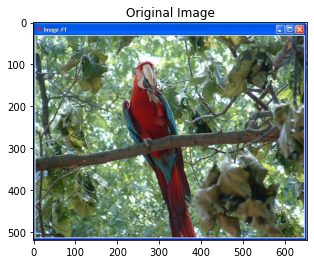

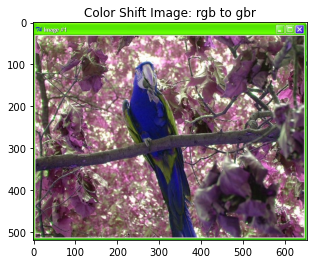

In [ ]:
#  PIL example; load image and perform a color shift
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
mg = Image.open(urllib.request.urlopen(url))

plt.title('Original Image')
plt.imshow(mg)
plt.show()

r,g,b = mg.split()
mg2 = Image.merge('RGB', (g,b,r))

plt.title('Color Shift Image: rgb to gbr')
plt.imshow(mg2)
plt.show()

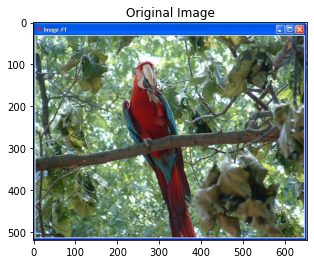

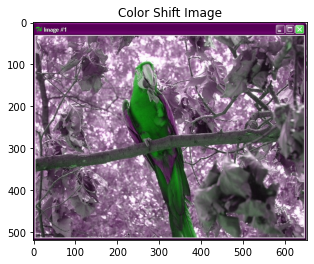

In [ ]:
#  scipy example; load image and perform a color shift
import imageio
import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'

adata = imageio.imread(url)
plt.title('Original Image')
plt.imshow(adata)
plt.show()

bdata = nd.shift(adata, (0,0,1), mode='wrap')  #  array is shifted using spline interpolation of the requested order
plt.title('Color Shift Image')
plt.imshow(bdata)
plt.show()

<br><br><br><br>

<b>A simple example of the summation function is to convert a color image to grayscale by</b><br><br>

$\mathbf{b}[\vec{x}]=\sum_{\mathcal{L}}\left\{\begin{array}{c}0.5 \\ 0.75 \\ 0.25\end{array}\right\} \mathbf{a}[\vec{x}]$

<b>This example conversion favors the green information at the expense of the blue information which is common for grayscale conversions</b><br><br>

<br><br>

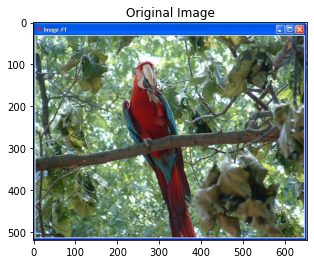

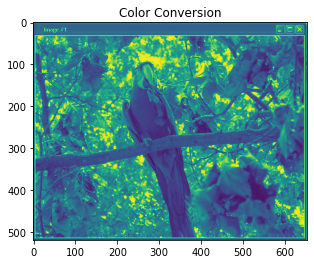

In [ ]:
#  example showing color conversion
import imageio

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'

adata = imageio.imread(url)
plt.title('Original Image')
plt.imshow(adata)
plt.show()

bdata = 0.5 *adata[:,:,0] + 0.75*adata[:,:,1] + 0.25*adata[:,:,2]
plt.title('Color Conversion')
plt.imshow(bdata)
plt.show()

<br><br><br><br>

## Channel Operator List

<br>

<div class="alert alert-block alert-warning">
$\begin{Bmatrix} \cdot \\ \cdot \\ \cdot \end{Bmatrix}$ Channel isolation - accesses individual channels in an image<br><br>
$\mathcal{L}_m$ Color model conversion - converts an image into the specified color model $m$<br><br>
$\varnothing$ Block - prevents information from one channel from participating in the computation<br><br>
$\Join$ Pass - allows a channel to pass through without alteration<br><br>
$\sum_{\mathcal{L}}$ Summation - creates a new image from the addition of the different color channels<br><br>
$\prod_{\mathcal{L}}$ Product - creates a new image from the multiplication of the different color channels<br><br>
</div>

<br><br><br><br>


## Informational Operators

<b>An informational operator returns information about an image without altering the image</b><br><br>

<b>First example is the size operator, $Z$, which returns the size of the image as a vector</b><br><br>

<b>Bird image shown has 519 pixels in the vertical dimension and 653 pixels in the horizontal dimension, thus the size vector is ${\vec v} = (519, 653)$</b><br><br>

<b>The color bird image is $\vec v = (519, 653, 3)$. The operator notation for this is</b><br><br>

$\vec v = Z {\bf a}$<br>

<br><br>

In [ ]:
#  example #1
# shape of the bird image

bdata = imageio.imread(url, as_gray=True).astype(np.uint8)
print('\nShape of the gray scale image:', bdata.shape)

adata = imageio.imread(url)
#  shape of the color bird image
print('\nShape of the color image:', adata.shape)


Shape of the gray scale image: (519, 653)

Shape of the color image: (519, 653, 3)


<br><br><br><br>

<b>Second example, is the operator that returns the location of the center of mass</b><br><br>

<b>This is applied to a binary valued image with a single contiguous region of ON pixels</b><br><br>

<b>It also returns a vector and is</b><br><br>

$\vec v = \boxtimes {\bf a}$<br>

<br><br>


Center of Mass of the image: (200.0, 300.0)


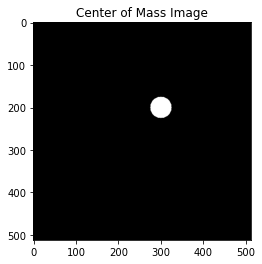

In [ ]:
#  example #2 - center of mass
from scipy import ndimage

def Circle(size, loc, rad):
#    frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
#    rad is integer of radius returns array with a solid circle
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad * rad).astype(int)
    return mask

cdata = Circle((512,512), (200,300), 25)
print('\nCenter of Mass of the image:', ndimage.center_of_mass(cdata))

plt.title('Center of Mass Image')
plt.imshow(cdata, cmap='gray')
plt.show()

<br><br><br><br>

<b>The third example is to determine the average pixel value for those pixels within a defined region that are greater than a threshold value $\gamma$</b><br><br>

<b>This process is defined as</b><br><br>

$t=\frac{\sum_{\vec{x}} \Gamma_{p,>\gamma} \square_{A} \mathbf{a}[\vec{x}]}{\sum_{\vec{x}} \Gamma_{>\gamma} \square_{A} \mathbf{a}[\vec{x}]}$

<b>The $\Box_A$ operator will extract part of the image as defined by $A$</b><br><br>

<b>Usually, this is in the form of two vectors which define the upper-left and lower-right corners of a rectangular region, and the result is a smaller image which is the information within this rectangle</b><br><br>

<b>The $\Gamma_{p,>\gamma}$ is a passive threshold and so the pixels that are less than $\gamma$ are set to 0 while the other pixels maintain their current value</b><br><br>

<b>One common use of this operator is to convert nearly dark backgrounds to completely dark backgrounds using a low value for $\gamma$</b><br><br>

<b>The denominator uses $\Gamma_{>\gamma}$ which converts those pixels that pass the threshold to a value of 1</b><br><br>

<b>Thus, the sum of these is the number of pixels that pass the threshold. The ratio, then, is the average value of the pixels within a defined region that pass a threshold</b><br><br>

<b>An operator notation that produces more efficient Python code is shown in these steps</b><br><br>

$\mathbf{b}[\vec{x}]=\square_{A} \mathbf{a}[\vec{x}]$

and

$t=\frac{\sum_{\vec{x}}\left(\left(\Gamma_{p,>\gamma} \mathbf{b}[\vec{x}]\right) \times \mathbf{b}[\vec{x}]\right)}{\sum_{\vec{x}} \Gamma_{>\gamma} \mathbf{b}[\vec{x}]}$

<br><br>

In [ ]:
#  third example
gamma = 200
num = ((adata[100:200, 100:300] > gamma) * adata[100:200, 100:300]).sum()
den = (adata[100:200, 100:300] > gamma).sum()
print('\nAverage density of the image:', round(num/den, 2))


Average density of the image: 229.68


<br><br><br><br>

<b>The final example uses the Energy operator, $\mathcal{E}$, Energy operator which returns the energy contained within an image</b><br><br>

<b>This is accomplished by summing the squares of the pixel values and dividing by the number of pixels</b><br><br>

<b>The energy of a red channel is</b><br><br>

$f_{r}=\frac{\sum_{\vec{x}}\left(\left\{\begin{array}{l}1 \\ \emptyset \\ \emptyset\end{array}\right\} \mathbf{a}[\vec{x}]\right)^{2}}{N \mathbf{a}[\vec{x}]}$

<b>where $N$ is the Count operator Count operator that returns the number of pixels</b><br><br>

<b>The value $f_r$ is the energy of the red channel of image ${\bf a}[\vec x]$</b><br><br>

<br><br>

<b>The total energy is the sum of the energies of the three channels and is defined as</b><br><br>

$f=\mathcal{E}[\vec{x}] \equiv \frac{\sum_{R G B} \sum_{\vec{x}}(\mathbf{a}[\vec{x}])^{2}}{N \mathbf{a}[\vec{x}]}$

<b>The task in this final example is to determine which of the color channels has the most energy.  The notation is</b><br><br>

$t=A_{\vee}\left\{\mathcal{E}\left\{\begin{array}{l}1 \\ \emptyset \\ \emptyset\end{array}\right\} \mathbf{a}[\vec{x}], \mathcal{E}\left\{\begin{array}{l}\emptyset \\ 1 \\ \emptyset\end{array}\right\} \mathbf{a}[\vec{x}], \mathcal{E}\left\{\begin{array}{l}\emptyset \\ \emptyset \\ 1\end{array}\right\} \mathbf{a}[\vec{x}]\right\}$

<b>Here the curly braces have two purposes with the first being the separation of the color channels</b><br><br>

<b>The second is the outer layer of curly braces which collects the three energy values into a set</b><br><br>

<b>The operator $A_\vee$ then returns the location of the largest value, which in this case is the identifier of which image in the set had the largest value</b><br><br>

<br><br>

In [ ]:
#  example #4
adata = imageio.imread(url)

V,H,N = adata.shape
nrgs = map(lambda x: (adata[:,:,x]**2).sum()/(V*H), [0,1,2])
t = np.array(list(nrgs)).argmax()
print('\nChannel that has the most energy:', t)


Channel that has the most energy: 2


<br><br><br><br>

## Information Operator List

<br>

<div class="alert alert-block alert-success">
${\bf a}^\dagger [\vec x]$ Complex conjugate - returns the complex conjugate of the image<br><br>
$\mathfrak{R} {\bf a}[\vec x]$ Real component returns the real component of the image<br><br>
$\mathfrak{I} {\bf a}[\vec x]$ Complex component returns the imaginary component of the image<br><br>
${\bf a}[\vec x] \stackrel{?}{=} {\bf b}[\vec x]$ Is equal - returns a binary valued image with pixels set to 1 if the same pixels have the same value in the input images<br><br>
$>$, $<$, $\ge$, $\le$ Comparisons - used just as the previous operator to determine the relationships between pixel values<br><br>
${\bf a}[\vec x] \cdot {\bf b}[\vec x]$ Inner product - returns a scalar value for the inner product<br><br>
$\boxtimes {\bf a}[\vec x]$ Center of mass - returns a vector that is the center of mass of the image<br><br>
$\bigvee$, $\bigwedge$ Max and min - returns the maximum or minimum value in an image.<br><br>
$A_\vee$, $A_\wedge$ & Max and min locations & Returns the locations of the max or min<br><br>
$\mathfrak{D} (a,b)$ Distance - returns the Euclidean distance between entities $a$ and $b$<br><br>
$\mathcal{E}{\bf a}[\vec x]$ Energy - returns the energy of an image<br><br>
$\mathcal{M}{\bf a}[\vec x]$ Average returns the average pixel value<br><br>
$N {\bf a}[\vec x]$ Count - returns the number of pixels<br><br>
$\mathcal{N} {\bf a}[\vec x]$ Nonzero - returns the locations of the nonzero elements<br><br>
$\mathcal{O}_{\downarrow, C}$ Sort - returns a sort order of the data.  The direction of the arrow indicates if the return is incremental or decremental.  Condition $C$ may be applied if necessary<br><br>
$\mathcal{T}_A {\bf a}[\vec x]$ Regional standard deviation - returns an image in which are the local standard deviation values over a region of size $A$ for every pixel in the image<br><br>
$V {\bf a}[\vec x]$ Covariance - returns the covariance matrix<br><br>
$Z {\bf a}[\vec x]$ Dimension - returns the dimensions of the image<br><br>
</div>

<br><br><br><br>

## Intensity Operators

<br>

<b>One example is a threshold operator, $\Gamma$, which compares all values in an image to a threshold</b><br><br>

<b>This operator has several variants</b><br><br>

<b>The first is to simply determine which pixels are greater than (or less than) some scalar value $\gamma$ as in</b><br><br>

${\bf b}[\vec x] = \Gamma_{>\gamma} {\bf a}[\vec x]$

<b>The output ${\bf b}[\vec x]$ is a binary valued image in which a pixel therein is set to 1 if the same pixel in ${\bf a}[\vec x]$ is greater than $\gamma$</b><br><br>

<b>Otherwise, the pixel is set to 0</b><br><br>

<b>The operator $\Gamma_{a < b}$ would set pixels to 1 if they are greater than $a$ and less than $b$</b><br><br>

<b>The subscript $p$ is used to described a passive threshold</b><br><br>

<b>Thus, $\Gamma_{p>4}$ would set all pixels less than 4 to a value of 0 but allow the other pixels to maintain their current value</b><br><br>

<b>Consider the following example. The protocol for this example is:</b><br><br>

1. Convert the image to the YIQ color model,
2. Apply a threshold to the I channel which sets to 1 only those pixels which have a value between .12 and .25,
3. Apply a threshold to the Q channel which sets to 1 only those pixels which have a value between .075 and .16, and
4. Multiply the resultant channels to form the final image.

<b>Example showing splitting colors is as follows</b><br><br>

<br><br>

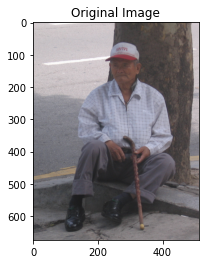

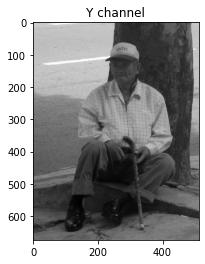

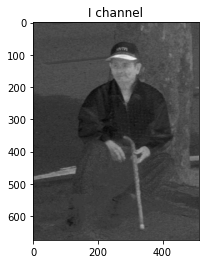

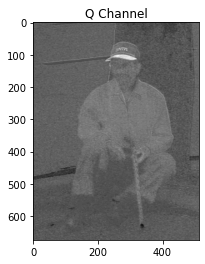

-0.03688777000000004


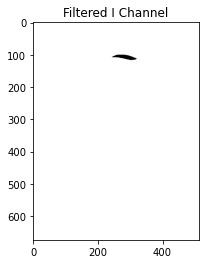

0.02026002427450974


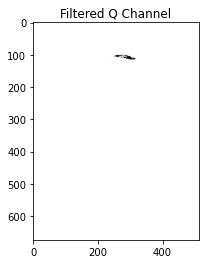

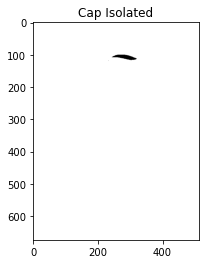

In [ ]:
# isolate the cap example
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import imageio
from skimage import color

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/man.png'
a = imageio.imread(url)
a = a[:,:,:-1]

plt.title('Original Image')
plt.imshow(np.asarray(a))
plt.show()

yiq = color.rgb2yiq(a)
y, i, q = cv2.split(yiq)

plt.title('Y channel')
plt.imshow(np.asarray(y), cmap='gray')
plt.show()

plt.title('I channel')
plt.imshow(np.asarray(i), cmap='gray')
plt.show()

plt.title('Q Channel')
plt.imshow(np.asarray(q), cmap='gray')
plt.show()

#  keep the pixels in the range we want
print(i[300,350])
z = 0
for x in range(i.shape[0]):
    for y in range(i.shape[1]):
        if i.item(x, y) >= .12 and i.item(x, y) <= .25:
            z = z + 1  #  counting the number of pixels in our range
        else:
            i[x, y] = 255

plt.title('Filtered I Channel')
plt.imshow(i, cmap='gray')
plt.show()

#  keep the pixels in the range we want
print(q[300,350])
zz = 0
for x in range(q.shape[0]):
    for y in range(q.shape[1]):
        if q.item(x, y) >= .075 and q.item(x, y) <= .16:
            zz = zz + 1  #  counting the number of pixels in our range
        else:
            q[x, y] = 255

plt.title('Filtered Q Channel')
plt.imshow(q, cmap='gray')
plt.show()

newImage = i * q
plt.title('Cap Isolated')
plt.imshow(newImage, cmap='gray')
plt.show()

<br><br><br><br>

## Intensity Operator List

<br>

<div class="alert alert-block alert-danger">
$ \mathbb{A} {\bf a}[\vec x]$  Absolute Value - returns array of absolute values<br><br>
$f {\bf a}[\vec x]$  Scaling  Multiplies value $f$ to all the pixels<br><br>
${\bf a}[\vec x] \ {\bf b}[\vec x]$  Binary AND - returns a binary-valued image that it is the binary AND of the two input images<br><br>
${\bf a}[\vec x] \| {\bf b}[\vec x]$  Binary OR - returns a binary-valued image that it is the binary OR of the two input images<br><br>
${\bf a}[\vec x] + {\bf b}[\vec x]$  Addition - returns the addition of two images<br><br>
${\bf a}[\vec x] - {\bf b}[\vec x]$  Subtraction - returns the subtraction of two images<br><br>
${\bf a}[\vec x] \times {\bf b}[\vec x]$  Multiplication - returns the elemental multiplication of two images<br><br>
$\bigtriangledown_n$, $\bigtriangleup_n$  Lo, Hi bits - returns an image that passes the $n$ lo or hi bits<br><br>
$\lhd_n$, $\rhd_n$  Erosion and Dilation - returns an image after applying the erosion or dilation operators for $n$ iterations<br><br>
$A_f {\bf a}[\vec x]$  Value location - returns the location of the pixels that have a value of $f$<br><br>
$\mathcal{B} {\bf a}[\vec x]$  Binary fill holes - returns an image with the holes filled in<br><br>
$E_m {\bf a}[\vec x]$  Edge enhancement - applies an edge enhancement to an image.  The type of edge enhancement is defined by $m$<br><br>
$\Gamma_n {\bf a}[\vec x]$  Threshold - returns an image after applying a threshold defined by $n$<br><br>
$\mathcal{H}{\bf a}[\vec x]$  Harris - applies the Harris corner detection algorithm<br><br>
$\mathcal{S}{\bf a}[\vec x]$  Smooth - applies a smoothing algorithm<br><br>
</div>

<br><br><br><br>

## Geometric Operators

<br>

<b>Geometric operators are those that move pixels rather than changing the intensity</b><br><br>

<b>One simple example is the rotation operator, $R$, which rotates the image an angle $\theta$ about a defined point $\vec v$</b><br><br>

<b>${\bf b}[\vec x] = R_{\theta,\vec v} {\bf a}[\vec x]$</b><br><br>

<b>The scaling operator changes the size of the image and is presented slightly different than other operators</b><br><br>

<b>The factor $\alpha$ governs the scaling with $\alpha>1$ increasing the size of the image</b><br><br>

<b>The notation is has two forms</b><br><br>

${\bf b}[\vec x] = {\bf a}[\alpha \vec x] = S_\alpha {\bf a}[\vec x]$

<br><br><br><br>

## Geometric Operator List

<br>

<div class="alert alert-block alert-info">
${\bf a}[\alpha \vec x]$ Scaling - returns an image that is a different size<br><br>
$ {\bf a}[{\bf M} \vec x]$ Affine - multiplies the matrix ${\bf M}$ by each coordinate vector<br><br>
$ \Box_{\vec v_1, \vec v_2} $  Window - extracts a subimage<br><br>
$\Downarrow_n$  Downsample - extracts pixels according to prescription $n$<br><br>
$B_\beta$  Bending - applies a barrel or pincushion transformation<br><br>
$C$  Coordinate map - moves the pixel according to the user defined map<br><br>
$\mathcal{C}_a$  Concatenation - creates a larger image from the concatenation of a images from an image set<br><br>
$D_{\vec v}$  Shift - shifts the image<br><br>
$M_\alpha$  Morph - creates a set of new images from the morph  of at least two input images<br><br>
$R_{\alpha, \vec v}$  Radial Coordinate - radial coordinate transformation<br><br>
$\mathcal{R}_{\theta, \vec v} $  Rotation - rotates an image through an angle $\theta$ centered at $\vec v$<br><br>
$U_{\vec v} $  Plop - places a smaller image in the center of a larger frame<br><br>
$\mathcal{V}_{\vec w}$  Reshape - reshapes the array<br><br>
$W_G$  Warp - warps an image to grid $G$<br><br>
$X$  Quadrant Swap - exchanges quadrants I and IV.  Exchanges quadrants II and III<br><br>
$\mathfrak{L}_m$  Flip - flips an image about a specified axi.<br><br>
</div>


<br><br><br><br>

## Transformation Operators

<br>

<b>Transformation operators create a new image or matrix representing the data in a very different coordinate system</b><br><br>

<b>The most popular of these is a Fourier transform which converts data from an image space to a frequency space</b><br><br>

<b>This transformation is written as</b><br><br>

\begin{equation}
 {\bf b}[\vec y] = \mathfrak{F} {\bf a}[\vec x]
\end{equation}

<b>The output space is defined by $y \in {\bf Y}$ as it is a different space than ${\bf X}$</b><br><br>

<b>In this case, ${\bf X}$ represents spatial coordinates and ${\bf Y}$ represents frequency coordinates</b><br><br>

<br><br><br><br>

## Transformation Operator List

<br>

<div class="alert alert-block alert-warning">
${\bf a}[\vec x] \otimes {\bf b}[\vec x]$  Correlation - returns the correlation of two images<br><br>
$\mathfrak{F}$  Fourier - returns the Fourier transform<br><br>
$H$  Hough - returns the Hough transform<br><br>
%$\mathcal{L}_G$  Color model transformation - returns the image in a new color model<br><br>
$P$  Polar - returns the polar coordinates<br><br>
$P^{-1}$  Inverse Polar - converts polar coordinates to rectilinear<br><br>
$\mathcal{P}_{\vec v} $  Radial Polar - returns the image as a radial-polar transformation.\index{radial-polar transformation}<br><br>
$\mathcal{P}^{-1}_{\vec v}$  Inverse Radial Polar - returns the image as the inverse radial-polar transformation<br><br>
$\mathfrak{P}_n$  PCA - returns the data in a new space defined by the principal components<br><br>
$ \mathcal{W}$  Wavelet decomposition - returns the wavelet decomposition image<br><br>
</div>

<br><br><br><br>


## Expansion Operators

<br>

<b>Expansion operators expand the dimensionality of an image usually in an attempt to decrease the complexity of the information contained therein</b><br><br>

<b>These operators can increase the number of dimensions or more commonly create a set of images from a single image</b><br><br>

<b>One example is empirical mode decomposition (EMD) which creates several images isolating information in limited frequency bands</b><br><br>

<b>An image set is enclosed by curly braces with an index parameter</b><br><br>

<b>The EMD operator is $\mathfrak{E}$ and thus the operator notation is</b><br><br>

$\{ {\bf b} [\vec x] \} = \mathfrak{E} {\bf a}[\vec x]$

<b>In this example the image set is $\{ {\bf b} [\vec x] \} = {\bf b}_1[\vec x], {\bf b}_2[\vec x], ..., {\bf b}_N[\vec x]$ where $N$ is the number of images generated by the operator</b><br><br>

<br><br><br><br>

## Expansion Operator List

<div class="alert alert-block alert-success">
$\mathfrak{E} $  EMD - returns a set of images from EMD decomposition<br><br>
$I_n$  ICM - returns a set of pulse images from the ICM process<br><br>
$\mathcal{I}$  Isolation - returns a set of images that isolate the contiguous regions in the input image<br><br>
$J_n$  PCNN - returns a set of pulse images from the PCNN process<br><br>
$T_n$  Eigenimages - returns a set of eigenimages<br><br>
</div>

<br><br><br><br>

## Summary

<b>Operators are an efficient method of accurately depicting common image processing protocols</b><br><br>

<b>These operators are organized into several operational categories</b><br><br>

<b>Creation operators are used to generate simple image frames</b><br><br>

<b>The channel operators isolate color channels and the informational operators report information <b>about an image without alteration</b><br><br>

<b>There are four classes that create new images from operations performed on input images or sets of images</b><br><br>

<b>The intensity operators are designed to alter the intensity but not the shape of the content</b><br><br>

<b>The geometric operators are just the opposite and are designed to move pixels to new locations but not alter the intensities of the content</b><br><br>

<b>The transformation operators rearrange the information into a very different coordinate system</b><br><br>

<b>Finally, the expansion operators create a set of images from a single image in an attempt to simplify the information within an image</b><br><br>

<b>The purpose of the operator notation is to mimic the scripting implementation of the protocol</b><br><br>

<b>In an ideal situation each operator should warrant only a single line of Python script</b><br><br>

<b>As this is accomplished the conversion between theory and implementation becomes more amenable</b><br><br>

<br><br><br><br><br><br><br><br><br><br><br><br>


# Homework

<b>Due by next class to be submitted on Blackboard in a jupyter notebook</b><br><br>

1. Given $\vec w = (200,200)$, $\vec v_1 = (10,100)$ and $\vec v_2 = (50, 150)$ and using the definitions provided above, how many pixels are set to 1 in ${\bf a}[\vec x] = {\bf r}_{\vec w, \vec v_1, \vec v_2}$ <br><br>

2. What is the value of $t$ in, $t = \sum_{\vec x} {\bf o}_{\vec w, \vec v, r}$ where $\vec w=(200,200)$, $\vec v =(100,100)$, and $r=50$? <br><br>

3.  Write the operator notation for the absolute value of the difference between the values in the red and green channels of an RGB image ${\bf a}[\vec x]$.

